In [4]:
import numpy as np #헤더파일 불러오는 거랑 비슷한듯
import pandas as pd
import seaborn as sns #as는 너무 긴 것을 축약하는 거임 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #프로그램 실행에 문제되지 않는 warning 은 다 무시 

In [6]:
df = pd.read_csv('C:/Users/frado/AI_STUDY_DATA/dataset.csv', index_col=0)
X = df.drop('target', axis=1)  # 특성 변수들
y = df['target']  # 목표 변수


In [7]:
# train & test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 12), (76, 12), (227,), (76,))

In [8]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.6973684210526315
[[16 17]
 [ 6 37]]


In [9]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0, max_iter=1000)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8289473684210527
[[24  9]
 [ 4 39]]


In [10]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8157894736842105
[[26  7]
 [ 7 36]]


In [11]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.8552631578947368
[[26  7]
 [ 4 39]]


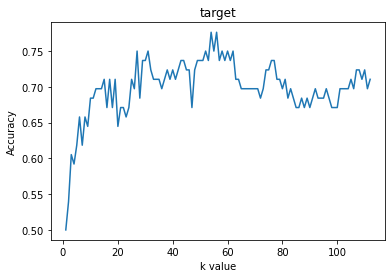

In [14]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("target")
plt.show()

In [15]:
X = df.drop('trestbps', axis=1)  # 'trestbps' 열을 제외한 나머지 열
y = df['trestbps']  # 'trestbps' 열

In [16]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=423)

In [17]:
# DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


In [18]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 28.047383794302778


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

0.8558621356302838


In [20]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 20.371662896786994


In [21]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.11939868028252898


In [23]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 18.2333481656059


In [22]:
from sklearn.svm import SVR

# SVR 모델 생성 및 학습
svr = SVR()
svr.fit(X_train, y_train)

# 예측
pred_svr = svr.predict(X_test)
print(pred_svr)

[130.86668548 129.78620333 130.17199489 129.69656385 130.43533058
 130.51806831 129.90043411 129.39447557 129.58813723 129.57161003
 129.64197458 129.6984148  129.94387705 129.48116293 129.93784898
 129.8034714  130.2468335  129.70472808 130.66983601 129.58072305
 129.82867402 130.47877189 130.0188195  129.67811988 129.71321331
 131.51038064 129.48008343 129.78134997 130.24941163 129.94945515
 130.17225531 129.26278846 129.43515372 129.18895572 129.153412
 129.81833926 129.62022228 129.51568422 129.37006315 129.71895912
 129.90293667 129.98870067 130.31934271 129.77819923 130.64995678
 129.38545625 129.03097609 129.6658688  129.81568057 129.75990859
 130.1379419  129.57551525 130.72899489 129.1174453  131.07423518
 129.769651   130.89839146 129.45072082 129.0844871  129.32679481
 129.24047155]


In [24]:
mse = np.sqrt(mean_squared_error(pred_svr, y_test))
print('SVR 평균제곱근오차:', mse)

SVR 평균제곱근오차: 18.444820245070684


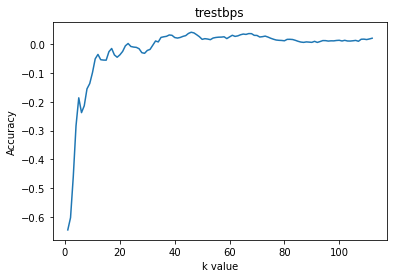

In [27]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsRegressor(n_neighbors = k)
  find_model.fit(X_train, y_train)

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("trestbps")
plt.show()
